-----------------
DIRECTION and CIRCLEs PERFORMANCE
----------------

In [1]:
import os, json
import basic_analysis_lib

json_folder = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data_ordered', "data_json")
json_files = [file for file in os.listdir(json_folder) if file.endswith(".json")]

csv_path =  os.path.join(os.path.expanduser('~/'), 'Desktop', 'FYP', 'code_env', 'eeg-notebooks', 'FYP', 'data')

all_performances = {}

for file in json_files:
    eeg_json_path = os.path.join(json_folder, file)
    condition, number, value = eeg_json_path.split('\\')[-1].split('_')[0], eeg_json_path.split('\\')[-1].split('_')[1], eeg_json_path.split('\\')[-1].split('_')[2].split('.')[0]
    circles_file_path = fr'C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\{condition}\{number}\{value}\blue_circles.csv'

    print("Computing performance for experiment: ", file)

    performance = basic_analysis_lib.merge_obj_performance(circles_file_path, eeg_json_path) # TODO
    
    all_performances[file] = performance

new_file_json = os.path.join(os.path.expanduser('~/'), 'Desktop', 'FYP', 'code_env', 'eeg-notebooks', 'FYP', 'results_data', 'Arrow_Circles_performance.json')
json_data = json.dumps(all_performances, indent=4)

with open(new_file_json, 'w') as file:
    file.write(json_data)
    print("New file at ", new_file_json)








Computing performance for experiment:  AudioVisual_01_1.json
Computing performance for experiment:  AudioVisual_01_2.json
Computing performance for experiment:  AudioVisual_02_1.json
Computing performance for experiment:  AudioVisual_03_1.json
Computing performance for experiment:  AudioVisual_03_2.json
Computing performance for experiment:  AudioVisual_04_1.json
Computing performance for experiment:  AudioVisual_04_2.json
Computing performance for experiment:  AudioVisual_05_1.json
Computing performance for experiment:  AudioVisual_05_2.json
Computing performance for experiment:  AudioVisual_06_1.json
Computing performance for experiment:  AudioVisual_06_2.json
Computing performance for experiment:  AudioVisual_07_1.json
Computing performance for experiment:  AudioVisual_07_2.json
Computing performance for experiment:  AudioVisual_09_1.json
Computing performance for experiment:  AudioVisual_09_2.json
Computing performance for experiment:  AudioVisual_10_1.json
Computing performance fo

--------------
Overall Results
--------------

AudioVisual_01_2.json
AudioVisual_02_1.json
AudioVisual_04_1.json
AudioVisual_06_1.json


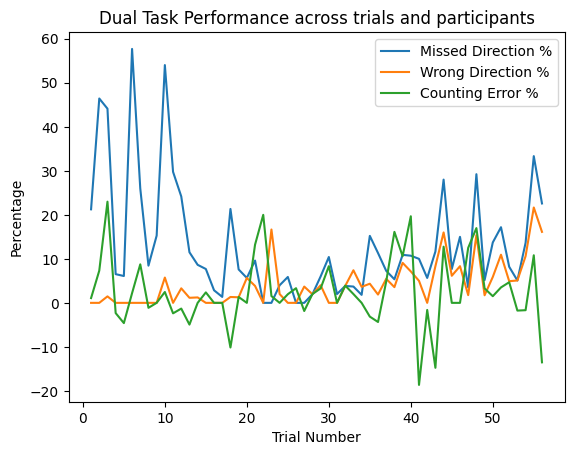

In [4]:
import matplotlib.pyplot as plt

Dir_Missed_pcg = []
Dir_Wrong_pcg = []
Cir_Error_pcg = []

for key in all_performances.keys():
    if all_performances[key]['Dir_Missed_pcg'] > 40:
        print(key)
    elif all_performances[key]['Dir_Wrong_pcg'] > 40:
        print(key)
    
    Dir_Missed_pcg.append(all_performances[key]['Dir_Missed_pcg'])
    Dir_Wrong_pcg.append(all_performances[key]['Dir_Wrong_pcg'])
    Cir_Error_pcg.append(all_performances[key]['Cir_Error_pcg'])

x_values = range(1,len(all_performances.keys())+1)
# Plot the three arrays on the same axis
plt.plot(x_values, Dir_Missed_pcg, label='Dir_Missed_pcg')
plt.plot(x_values, Dir_Wrong_pcg, label='Dir_Wrong_pcg')
plt.plot(x_values, Cir_Error_pcg, label='Cir_Error_pcg')

# Customize the plot
plt.xlabel('Trial Number')
plt.ylabel('Percentage')
plt.title('Dual Task Performance across trials and participants')
plt.legend(["Missed Direction %","Wrong Direction %", "Counting Error %"] )

# Display the plot
plt.show()



In [11]:
import numpy as np
print("Missed Directions: mean", np.mean(Dir_Missed_pcg), "std:", np.std(Dir_Missed_pcg))
print("Wrong Directions: mean", np.mean(Dir_Wrong_pcg), "std:", np.std(Dir_Wrong_pcg))
print("COunting Error: mean", np.mean(Cir_Error_pcg), "std:", np.std(Cir_Error_pcg))
print("Missed:",Dir_Missed_pcg)
print("Wrong:", Dir_Wrong_pcg)
print("Counting Error:", Cir_Error_pcg)

Missed: [21.25, 46.42857142857143, 44.11764705882353, 6.521739130434782, 6.097560975609756, 57.692307692307686, 26.0, 8.450704225352112, 15.277777777777779, 54.02298850574713, 29.761904761904763, 24.175824175824175, 11.494252873563218, 8.641975308641975, 7.6923076923076925, 2.857142857142857, 1.3513513513513513, 21.333333333333336, 7.59493670886076, 5.660377358490567, 9.615384615384617, 0.0, 0.0, 4.0, 5.88235294117647, 0.0, 0.0, 1.9607843137254901, 6.0, 10.416666666666668, 2.0, 3.8461538461538463, 3.7037037037037033, 1.8181818181818181, 15.217391304347828, 11.320754716981133, 7.2727272727272725, 5.357142857142857, 10.909090909090908, 10.714285714285714, 10.0, 5.660377358490567, 11.666666666666666, 28.000000000000004, 7.6923076923076925, 15.0, 3.508771929824561, 29.230769230769234, 5.172413793103448, 13.725490196078432, 17.1875, 8.19672131147541, 5.084745762711865, 13.636363636363635, 33.33333333333333, 22.58064516129032]
Wrong: [0.0, 0.0, 1.4705882352941175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Missed Directions: mean 13.32381124942908 std: 13.246714633861101
Wrong Directions: mean 4.243349642434747 std: 5.061214476545235
COunting Error: mean 2.4519888865788224 std: 7.9535774244236315


--------------
Comparative Results
-----------------

In [35]:
import matplotlib.pyplot as plt

Dir_Missed_pcg = {'Audio': [], 'Vibro': [], 'Shape': []}
Dir_Wrong_pcg =   {'Audio': [], 'Vibro': [], 'Shape': []}
Cir_Error_pcg =   {'Audio': [], 'Vibro': [], 'Shape': []}

for key in all_performances.keys():
    idx = 0
    if "Audio" in key:
        idx = 'Audio'
    elif "Vibro" in key:
        idx = 'Vibro'
    elif "Shape" in key:
        idx = 'Shape'
    
    Dir_Missed_pcg[idx].append(all_performances[key]['Dir_Missed_pcg'])
    Dir_Wrong_pcg[idx].append(all_performances[key]['Dir_Wrong_pcg'])
    Cir_Error_pcg[idx].append(all_performances[key]['Cir_Error_pcg'])


In [36]:

x_values = list(all_performances.keys())
# Plot the three arrays on the same axis
for key in Dir_Missed_pcg.keys():
    
    # plt.plot(Dir_Missed_pcg[key], label='Dir_Missed_pcg')
    # plt.plot(Dir_Wrong_pcg[key], label='Dir_Wrong_pcg')
    # plt.plot(Cir_Error_pcg[key], label='Cir_Error_pcg')

    # # Customize the plot
    # plt.xlabel('X Values')
    # plt.ylabel('Y Values')
    # plt.title(f'Dual Task Performance across participants, mode {key} ')
    # plt.legend(["Missed Direction %","Wrong Direction %", "Counting Error %"] )

    # Display the plot
    #plt.show()
    print("-----------", key, "------------")
    print("Missed Directions: mean", np.mean(Dir_Missed_pcg[key]), "std:", np.std(Dir_Missed_pcg[key]))
    print("Wrong Directions: mean", np.mean(Dir_Wrong_pcg[key]), "std:", np.std(Dir_Wrong_pcg[key]))
    print("Counting Error: mean", np.mean(Cir_Error_pcg[key]), "std:", np.std(Cir_Error_pcg[key]))

audio_missed = Dir_Missed_pcg['Audio']
audio_wrong = Dir_Wrong_pcg['Audio']
audio_count = Cir_Error_pcg['Audio']
vibro_missed = Dir_Missed_pcg ['Vibro']
vibro_wrong = Dir_Wrong_pcg['Vibro']
vibro_count = Cir_Error_pcg['Vibro']
shape_missed = Dir_Missed_pcg['Shape']
shape_wrong = Dir_Wrong_pcg['Shape']
shape_count = Cir_Error_pcg['Shape']
print("------AUDIO-------")
print(audio_missed)
print(audio_wrong)
print(audio_count)
print("------VIBRO-------")
print(vibro_missed)
print(vibro_wrong)
print(vibro_count)
print("------SHAPE-------")
print(shape_missed)
print(shape_wrong)
print(shape_count)


----------- Audio ------------
Missed Directions: mean 21.092753992502857 std: 17.269965536617086
Wrong Directions: mean 0.8156614355533355 std: 1.4444995160845127
Counting Error: mean 1.1428435938388624 std: 6.552557406608574
----------- Vibro ------------
Missed Directions: mean 13.196467641283093 std: 8.503156863492219
Wrong Directions: mean 8.15838916911903 std: 5.439820159220156
Counting Error: mean 3.267415523178895 std: 10.241236680062995
----------- Shape ------------
Missed Directions: mean 4.790691252047773 std: 4.398071064705677
Wrong Directions: mean 3.468366430497169 std: 3.933411408814782
Counting Error: mean 2.9558258177586936 std: 5.835520346925811
------AUDIO-------
[21.25, 46.42857142857143, 44.11764705882353, 6.521739130434782, 6.097560975609756, 57.692307692307686, 26.0, 8.450704225352112, 15.277777777777779, 54.02298850574713, 29.761904761904763, 24.175824175824175, 11.494252873563218, 8.641975308641975, 7.6923076923076925, 2.857142857142857, 1.3513513513513513, 21

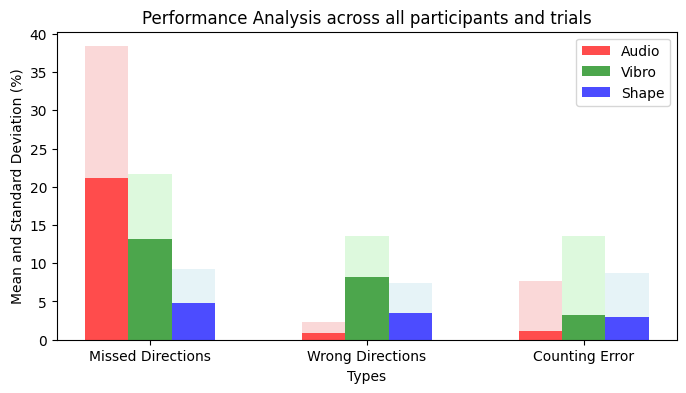

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Missed Directions
audio_missed_mean = 21.092753992502857
audio_missed_std = 17.269965536617086
vibro_missed_mean = 13.196467641283093
vibro_missed_std = 8.503156863492219
shape_missed_mean = 4.790691252047773
shape_missed_std = 4.398071064705677

# Data for Wrong Directions
audio_wrong_mean = 0.8156614355533355
audio_wrong_std = 1.4444995160845127
vibro_wrong_mean = 8.15838916911903
vibro_wrong_std = 5.439820159220156
shape_wrong_mean = 3.468366430497169
shape_wrong_std = 3.933411408814782

# Data for Counting Error
audio_count_mean = 1.1428435938388624
audio_count_std = 6.552557406608574
vibro_count_mean = 3.267415523178895
vibro_count_std = 10.241236680062995
shape_count_mean = 2.9558258177586936
shape_count_std = 5.835520346925811

# Define the conditions and types
conditions = ['Audio', 'Vibro', 'Shape']
types = ['Missed Directions', 'Wrong Directions', 'Counting Error']

# Define the positions for the bars
x = np.arange(len(types))
bar_width = 0.2

# Create the bar chart
plt.figure(figsize=(8, 4))

# Plot mean bars
plt.bar(x, [audio_missed_mean, audio_wrong_mean, audio_count_mean], width=bar_width, align='center',
        label='Audio', alpha=0.7, color='red')

plt.bar(x + bar_width, [vibro_missed_mean, vibro_wrong_mean, vibro_count_mean], width=bar_width, align='center',
        label='Vibro', alpha=0.7, color='green')

plt.bar(x + 2 * bar_width, [shape_missed_mean, shape_wrong_mean, shape_count_mean], width=bar_width, align='center',
        label='Shape', alpha=0.7, color='blue')

# Plot standard deviation bars
plt.bar(x, [audio_missed_std, audio_wrong_std, audio_count_std], width=bar_width, align='center', bottom=[audio_missed_mean, audio_wrong_mean, audio_count_mean],
        alpha=0.3, color='lightcoral')

plt.bar(x + bar_width, [vibro_missed_std, vibro_wrong_std, vibro_count_std], width=bar_width, align='center', bottom=[vibro_missed_mean, vibro_wrong_mean, vibro_count_mean],
        alpha=0.3, color='lightgreen')

plt.bar(x + 2 * bar_width, [shape_missed_std, shape_wrong_std, shape_count_std], width=bar_width, align='center', bottom=[shape_missed_mean, shape_wrong_mean, shape_count_mean],
        alpha=0.3, color='lightblue')

# Customize the plot
plt.xlabel('Types')
plt.ylabel('Mean and Standard Deviation (%)')
plt.title('Performance Analysis across all participants and trials')
plt.xticks(x + bar_width, types)
plt.legend()

# Display the plot
plt.show()


In [21]:
import matplotlib.pyplot as plt

Dir_Missed_pcg = {'Trial1': [], 'Trial2': []}
Dir_Wrong_pcg =   {'Trial1': [], 'Trial2': []}
Cir_Error_pcg =   {'Trial1': [], 'Trial2': []}

for key in all_performances.keys():
    idx = 0
    if "_1." in key:
        idx = 'Trial1'
    elif "_2." in key:
        idx = 'Trial2'
    
    Dir_Missed_pcg[idx].append(all_performances[key]['Dir_Missed_pcg'])
    Dir_Wrong_pcg[idx].append(all_performances[key]['Dir_Wrong_pcg'])
    Cir_Error_pcg[idx].append(all_performances[key]['Cir_Error_pcg'])

print("Missed Percentage")
print(Dir_Missed_pcg['Trial1'])
print(Dir_Missed_pcg['Trial2'])
print("Wrong Percentage")
print(Dir_Wrong_pcg['Trial1'])
print(Dir_Wrong_pcg['Trial2'])
print("Count Error Percentage")
print(Cir_Error_pcg['Trial1'])
print(Cir_Error_pcg['Trial2'])

for key in Dir_Missed_pcg.keys():
    print("-----------", key, "------------")
    print("Missed Directions: mean", np.mean(Dir_Missed_pcg[key]), "std:", np.std(Dir_Missed_pcg[key]))
    print("Wrong Directions: mean", np.mean(Dir_Wrong_pcg[key]), "std:", np.std(Dir_Wrong_pcg[key]))
    print("Counting Error: mean", np.mean(Cir_Error_pcg[key]), "std:", np.std(Cir_Error_pcg[key]))




Missed Percentage
[21.25, 44.11764705882353, 6.521739130434782, 57.692307692307686, 8.450704225352112, 54.02298850574713, 24.175824175824175, 8.641975308641975, 2.857142857142857, 21.333333333333336, 5.660377358490567, 0.0, 5.88235294117647, 0.0, 2.0, 3.7037037037037033, 15.217391304347828, 7.2727272727272725, 10.909090909090908, 10.0, 11.666666666666666, 7.6923076923076925, 3.508771929824561, 5.172413793103448, 17.1875, 5.084745762711865, 33.33333333333333]
[46.42857142857143, 6.097560975609756, 26.0, 15.277777777777779, 29.761904761904763, 11.494252873563218, 7.6923076923076925, 1.3513513513513513, 7.59493670886076, 9.615384615384617, 0.0, 4.0, 0.0, 1.9607843137254901, 6.0, 10.416666666666668, 3.8461538461538463, 1.8181818181818181, 11.320754716981133, 5.357142857142857, 10.714285714285714, 5.660377358490567, 28.000000000000004, 15.0, 29.230769230769234, 13.725490196078432, 8.19672131147541, 13.636363636363635, 22.58064516129032]
Wrong Percentage
[0.0, 1.4705882352941175, 0.0, 0.0, 0

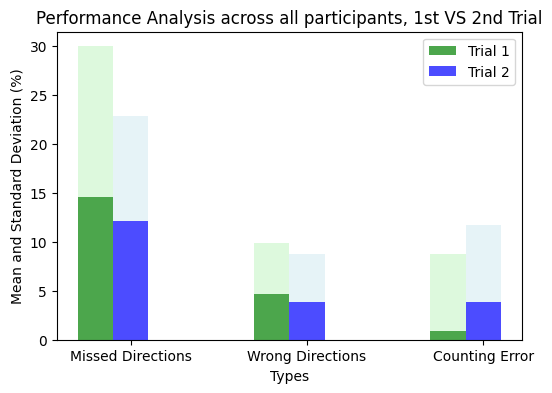

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#----------- Trial1 ------------
Missed_mean1 = 14.568705368707105 
Missed_std1 = 15.402104721812654
Wrong_mean1 = 4.6691989179455975 
Wrong_std1 = 5.177307321898015
Counting_mean1 = 0.9171288133370141 
Counting_std1 = 7.824467901888765

#----------- Trial2 ------------
Missed_mean2 = 12.164771896997808 
Missed_std2 = 10.733051376218674
Wrong_mean2 = 3.8468692824763697 
Wrong_std2 = 4.917642629642674
Counting_mean2 = 3.8809965409763687 
Counting_std2 =  7.80516564226399

# Define the conditions and types
conditions = ['First Trial', 'Secodn Trial']
types = ['Missed Directions', 'Wrong Directions', 'Counting Error']

# Define the positions for the bars
x = np.arange(len(types))
bar_width = 0.2

# Create the bar chart
plt.figure(figsize=(6, 4))

# Plot mean bars
plt.bar(x, [Missed_mean1,Wrong_mean1, Counting_mean1], width=bar_width, align='center',
        label='Trial 1', alpha=0.7, color='green')

plt.bar(x + bar_width, [Missed_mean2,Wrong_mean2, Counting_mean2], width=bar_width, align='center',
        label='Trial 2', alpha=0.7, color='blue')

# Plot standard deviation bars
plt.bar(x, [Missed_std1,Wrong_std1, Counting_std1], width=bar_width, align='center', bottom=[Missed_mean1,Wrong_mean1, Counting_mean1],
        alpha=0.3, color='lightgreen')

plt.bar(x + bar_width, [Missed_std2,Wrong_std2, Counting_std2], width=bar_width, align='center', bottom=[Missed_mean2,Wrong_mean2, Counting_mean2],
        alpha=0.3, color='lightblue')


# Customize the plot
plt.xlabel('Types')
plt.ylabel('Mean and Standard Deviation (%)')
plt.title('Performance Analysis across all participants, 1st VS 2nd Trial')
plt.xticks(x + bar_width, types)
plt.legend()

# Display the plot
plt.show()


-----------------
STATISTICAL ANALYSIS
------------------
- Brown-Forsythe test to assess whether the variance is homogeneous or statistically different
- if homogeneous, perform ANOVA tests

In [56]:
import scipy.stats as stats

# Define the data for the Brown-Forsythe test
trial1_missed = [21.25, 44.11764705882353, 6.521739130434782, 57.692307692307686, 8.450704225352112, 54.02298850574713, 24.175824175824175, 8.641975308641975, 2.857142857142857, 21.333333333333336, 5.660377358490567, 0.0, 5.88235294117647, 0.0, 2.0, 3.7037037037037033, 15.217391304347828, 7.2727272727272725, 10.909090909090908, 10.0, 11.666666666666666, 7.6923076923076925, 3.508771929824561, 5.172413793103448, 17.1875, 5.084745762711865, 33.33333333333333]
trial2_missed = [46.42857142857143, 6.097560975609756, 26.0, 15.277777777777779, 29.761904761904763, 11.494252873563218, 7.6923076923076925, 1.3513513513513513, 7.59493670886076, 9.615384615384617, 0.0, 4.0, 0.0, 1.9607843137254901, 6.0, 10.416666666666668, 3.8461538461538463, 1.8181818181818181, 11.320754716981133, 5.357142857142857, 10.714285714285714, 5.660377358490567, 28.000000000000004, 15.0, 29.230769230769234, 13.725490196078432, 8.19672131147541, 13.636363636363635, 22.58064516129032]
trial1_wrong = [0.0, 1.4705882352941175, 0.0, 0.0, 0.0, 5.747126436781609, 3.296703296703297, 1.2345679012345678, 0.0, 1.3333333333333335, 5.660377358490567, 16.666666666666664, 0.0, 3.7037037037037033, 0.0, 7.4074074074074066, 4.3478260869565215, 5.454545454545454, 9.090909090909092, 5.0, 8.333333333333332, 6.153846153846154, 1.7543859649122806, 1.7241379310344827, 10.9375, 5.084745762711865, 21.666666666666668]
trial2_wrong = [0.0, 0.0, 0.0, 0.0, 0.0, 1.1494252873563218, 0.0, 0.0, 1.2658227848101267, 3.8461538461538463, 0.0, 2.0, 0.0, 1.9607843137254901, 4.0, 0.0, 3.8461538461538463, 3.6363636363636362, 1.8867924528301887, 3.571428571428571, 7.142857142857142, 0.0, 16.0, 8.333333333333332, 15.384615384615385, 5.88235294117647, 4.918032786885246, 10.606060606060606, 16.129032258064516]
trial1_count = [1.0869565217391304, 22.988505747126435, -2.3255813953488373, 2.197802197802198, -1.1235955056179776, 2.4691358024691357, -1.2987012987012987, 0.0, 0.0, -10.144927536231885, 0.0, 1.5384615384615385, 1.9607843137254901, -1.8518518518518516, 0.0, 2.0, -3.125, 4.838709677419355, 10.606060606060606, -18.64406779661017, -14.754098360655737, 0.0, 12.5, 3.278688524590164, 3.508771929824561, -1.7543859649122806, 10.81081081081081]
trial2_count = [7.317073170731707, -4.597701149425287, 8.75, 0.0, -2.380952380952381, -4.938271604938271, 2.380952380952381, 0.0, 1.3333333333333335, 13.20754716981132, 20.0, 0.0, 3.3333333333333335, 2.0, 3.278688524590164, 8.333333333333332, 3.9215686274509802, 0.0, -4.3478260869565215, 16.129032258064516, 19.672131147540984, -1.6129032258064515, 12.76595744680851, 0.0, 16.9811320754717, 1.5151515151515151, 4.6875, -1.6666666666666667, -13.513513513513514]

# Perform the Brown-Forsythe test
_, p_value = stats.levene(trial1_wrong, trial2_wrong, center='median')

# Print the results
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
else:
    print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)


The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.8131194505243405


In [40]:
#------AUDIO-------
a_missed =[21.25, 46.42857142857143, 44.11764705882353, 6.521739130434782, 6.097560975609756, 57.692307692307686, 26.0, 8.450704225352112, 15.277777777777779, 54.02298850574713, 29.761904761904763, 24.175824175824175, 11.494252873563218, 8.641975308641975, 7.6923076923076925, 2.857142857142857, 1.3513513513513513, 21.333333333333336, 7.59493670886076]
a_wrong =[0.0, 0.0, 1.4705882352941175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.747126436781609, 0.0, 3.296703296703297, 1.1494252873563218, 1.2345679012345678, 0.0, 0.0, 0.0, 1.3333333333333335, 1.2658227848101267]
a_count = [1.0869565217391304, 7.317073170731707, 22.988505747126435, -2.3255813953488373, -4.597701149425287, 2.197802197802198, 8.75, -1.1235955056179776, 0.0, 2.4691358024691357, -2.380952380952381, -1.2987012987012987, -4.938271604938271, 0.0, 2.380952380952381, 0.0, 0.0, -10.144927536231885, 1.3333333333333335]
#------VIBRO-------
v_missed = [7.2727272727272725, 5.357142857142857, 10.909090909090908, 10.714285714285714, 10.0, 5.660377358490567, 11.666666666666666, 28.000000000000004, 7.6923076923076925, 15.0, 3.508771929824561, 29.230769230769234, 5.172413793103448, 13.725490196078432, 17.1875, 8.19672131147541, 5.084745762711865, 13.636363636363635, 33.33333333333333, 22.58064516129032]
v_wrong = [5.454545454545454, 3.571428571428571, 9.090909090909092, 7.142857142857142, 5.0, 0.0, 8.333333333333332, 16.0, 6.153846153846154, 8.333333333333332, 1.7543859649122806, 15.384615384615385, 1.7241379310344827, 5.88235294117647, 10.9375, 4.918032786885246, 5.084745762711865, 10.606060606060606, 21.666666666666668, 16.129032258064516]
v_count =[4.838709677419355, 16.129032258064516, 10.606060606060606, 19.672131147540984, -18.64406779661017, -1.6129032258064515, -14.754098360655737, 12.76595744680851, 0.0, 0.0, 12.5, 16.9811320754717, 3.278688524590164, 1.5151515151515151, 3.508771929824561, 4.6875, -1.7543859649122806, -1.6666666666666667, 10.81081081081081, -13.513513513513514]
#------SHAPE-------
s_missed =[5.660377358490567, 9.615384615384617, 0.0, 0.0, 4.0, 5.88235294117647, 0.0, 0.0, 1.9607843137254901, 6.0, 10.416666666666668, 2.0, 3.8461538461538463, 3.7037037037037033, 1.8181818181818181, 15.217391304347828, 11.320754716981133]
s_wrong =[5.660377358490567, 3.8461538461538463, 0.0, 16.666666666666664, 2.0, 0.0, 0.0, 3.7037037037037033, 1.9607843137254901, 4.0, 0.0, 0.0, 3.8461538461538463, 7.4074074074074066, 3.6363636363636362, 4.3478260869565215, 1.8867924528301887]
s_count =[0.0, 13.20754716981132, 20.0, 1.5384615384615385, 0.0, 1.9607843137254901, 3.3333333333333335, -1.8518518518518516, 2.0, 3.278688524590164, 8.333333333333332, 0.0, 3.9215686274509802, 2.0, 0.0, -3.125, -4.3478260869565215]

_, p_value = stats.levene(a_missed, v_missed, s_missed, center='median')
_, p_bartlett = stats.bartlett(a_missed, v_missed, s_missed)
print(p_bartlett)

# Print the results
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance. !!")
else:
    print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.")

_, p_value = stats.levene(a_wrong, v_wrong, s_wrong, center='median')
_, p_bartlett = stats.bartlett(a_wrong, v_wrong, s_wrong)
print(p_bartlett)
# Print the results
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
else:
    print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.")

_, p_value = stats.levene(a_count, v_count, s_count, center='median')
_, p_bartlett = stats.bartlett(a_count, v_count, s_count)
print(p_bartlett)
# Print the results
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
else:
    print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.")

print("The p-value from Bartlett’s test is less than α = .05, which means we can reject the null hypothesis that each group has the same variance. Thus, the assumption of equal variances is violated and we can proceed to perform Welch’s ANOVA.")

1.2656144638072733e-06
The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance. !!
4.108424857313422e-06
The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.
0.04155266560252007
The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.
The p-value from Bartlett’s test is less than α = .05, which means we can reject the null hypothesis that each group has the same variance. Thus, the assumption of equal variances is violated and we can proceed to perform Welch’s ANOVA.


In [50]:
import pingouin as pg
import pandas as pd
import numpy as np
  
missed = [21.25, 46.42857142857143, 44.11764705882353, 6.521739130434782, 6.097560975609756, 57.692307692307686, 26.0, 8.450704225352112, 15.277777777777779, 54.02298850574713, 29.761904761904763, 24.175824175824175, 11.494252873563218, 8.641975308641975, 7.6923076923076925, 2.857142857142857, 1.3513513513513513, 7.2727272727272725, 5.357142857142857, 10.909090909090908, 10.714285714285714, 10.0, 5.660377358490567, 11.666666666666666, 28.000000000000004, 7.6923076923076925, 15.0, 3.508771929824561, 29.230769230769234, 5.172413793103448, 13.725490196078432, 17.1875, 8.19672131147541, 5.084745762711865, 5.660377358490567, 9.615384615384617, 0.0, 0.0, 4.0, 5.88235294117647, 0.0, 0.0, 1.9607843137254901, 6.0, 10.416666666666668, 2.0, 3.8461538461538463, 3.7037037037037033, 1.8181818181818181, 15.217391304347828, 11.320754716981133]
print("Null Hypothesis statistical difference missed")
# create DataFrame

df_missed = pd.DataFrame({'score': missed,
                   'group': np.repeat(['Audio', 'Vibro', 'Shape'],
                                      repeats=17)})
  
# perform Welch's ANOVA
pg.welch_anova(dv='score', between='group', data=df_missed)


Null Hypothesis statistical difference missed


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,27.358322,10.210794,0.000487,0.273325


In [51]:

wrong = [0.0, 0.0, 1.4705882352941175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.747126436781609, 0.0, 3.296703296703297, 1.1494252873563218, 1.2345679012345678, 0.0, 0.0, 0.0,5.454545454545454, 3.571428571428571, 9.090909090909092, 7.142857142857142, 5.0, 0.0, 8.333333333333332, 16.0, 6.153846153846154, 8.333333333333332, 1.7543859649122806, 15.384615384615385, 1.7241379310344827, 5.88235294117647, 10.9375, 4.918032786885246, 5.084745762711865,5.660377358490567, 3.8461538461538463, 0.0, 16.666666666666664, 2.0, 0.0, 0.0, 3.7037037037037033, 1.9607843137254901, 4.0, 0.0, 0.0, 3.8461538461538463, 7.4074074074074066, 3.6363636363636362, 4.3478260869565215, 1.8867924528301887]
print("Null Hypothesis statistical difference wrong")
# create DataFrame

df_wrong = pd.DataFrame({'score': wrong,
                   'group': np.repeat(['Audio', 'Vibro', 'Shape'],
                                      repeats=17)})
  
# perform Welch's ANOVA
pg.welch_anova(dv='score', between='group', data=df_wrong)


Null Hypothesis statistical difference wrong


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,26.059266,15.627091,0.000035,0.334781


In [53]:

count = [1.0869565217391304, 7.317073170731707, 22.988505747126435, 2.3255813953488373, 4.597701149425287, 2.197802197802198, 8.75, 1.1235955056179776, 0.0, 2.4691358024691357, 2.380952380952381, 1.2987012987012987, 4.938271604938271, 0.0, 2.380952380952381, 0.0, 0.0,4.838709677419355, 16.129032258064516, 10.606060606060606, 19.672131147540984, 18.64406779661017, 1.6129032258064515, 14.754098360655737, 12.76595744680851, 0.0, 0.0, 12.5, 16.9811320754717, 3.278688524590164, 1.5151515151515151, 3.508771929824561, 4.6875, 1.7543859649122806, 0.0, 13.20754716981132, 20.0, 1.5384615384615385, 0.0, 1.9607843137254901, 3.3333333333333335, 1.8518518518518516, 2.0, 3.278688524590164, 8.333333333333332, 0.0, 3.9215686274509802, 2.0, 0.0, 3.125, 4.3478260869565215]
print("Null Hypothesis statistical difference count")
# create DataFrame

df_count = pd.DataFrame({'score': count,
                   'group': np.repeat(['Audio', 'Vibro', 'Shape'],
                                      repeats=17)})
  
# perform Welch's ANOVA
pg.welch_anova(dv='score', between='group', data=df_count)



Null Hypothesis statistical difference count


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,31.580044,2.629106,0.087875,0.117501


--------------------------
TRIALS AND STIMULATION MODALITIES
---------------------

In [59]:
import matplotlib.pyplot as plt

Dir_Missed_pcg = {'Audio01': [], 'Vibro01': [], 'Shape01': [], 'Audio02': [], 'Vibro02': [], 'Shape02': []}
Dir_Wrong_pcg =   {'Audio01': [], 'Vibro01': [], 'Shape01': [], 'Audio02': [], 'Vibro02': [], 'Shape02': []}
Cir_Error_pcg =   {'Audio01': [], 'Vibro01': [], 'Shape01': [], 'Audio02': [], 'Vibro02': [], 'Shape02': []}

for key in all_performances.keys():
    idx = 0
    if "_1." in key:
        if "Audio" in key:
            idx = 'Audio01'
        elif "Vibro" in key:
            idx = 'Vibro01'
        elif "Shape" in key:
            idx = 'Shape01'
    elif "_2." in key:
        if "Audio" in key:
            idx = 'Audio02'
        elif "Vibro" in key:
            idx = 'Vibro02'
        elif "Shape" in key:
            idx = 'Shape02'
    
    Dir_Missed_pcg[idx].append(all_performances[key]['Dir_Missed_pcg'])
    Dir_Wrong_pcg[idx].append(all_performances[key]['Dir_Wrong_pcg'])
    Cir_Error_pcg[idx].append(all_performances[key]['Cir_Error_pcg'])

for key in Dir_Missed_pcg.keys():
    print("-----------", key, "------------")
    print("Missed Directions: mean", np.mean(Dir_Missed_pcg[key]), "std:", np.std(Dir_Missed_pcg[key]))
    print("Wrong Directions: mean", np.mean(Dir_Wrong_pcg[key]), "std:", np.std(Dir_Wrong_pcg[key]))
    print("Counting Error: mean", np.mean(Cir_Error_pcg[key]), "std:", np.std(Cir_Error_pcg[key]))



----------- Audio01 ------------
Missed Directions: mean 24.906366228760763 std: 19.17790452623532
Wrong Directions: mean 1.3082319203346926 std: 1.7957609187011632
Counting Error: mean 1.3849594533236897 std: 7.954091309944153
----------- Vibro01 ------------
Missed Directions: mean 11.182755735976574 std: 8.29508606598206
Wrong Directions: mean 7.520007035795933 std: 5.478908785928984
Counting Error: mean 1.0390489426527314 std: 9.948129812722764
----------- Shape01 ------------
Missed Directions: mean 4.637689329674081 std: 4.860500135487818
Wrong Directions: mean 5.3979973176035525 std: 5.2554695541049234
Counting Error: mean 0.07462771433359672 std: 1.8270794118818592
----------- Audio02 ------------
Missed Directions: mean 16.855407063327416 std: 13.670039823724123
Wrong Directions: mean 0.2683608969073832 std: 0.5028063107155247
Counting Error: mean 0.8738259721890537 std: 4.495317834281231
----------- Vibro02 ------------
Missed Directions: mean 15.210179546589615 std: 8.227322

In [62]:
for key1 in Dir_Missed_pcg.keys():
    for key2 in Dir_Missed_pcg.keys():
        if key1 != key2: 
            print("-----------------",key1, key2)
            print("-----MISSED-----")
            _, p_value = stats.levene(Dir_Missed_pcg[key1], Dir_Missed_pcg[key2], center='median')
            _, p_bartlett = stats.bartlett(Dir_Missed_pcg[key1], Dir_Missed_pcg[key2])
            print(p_bartlett)
            # Print the results
            if p_value < 0.05:
                print("The variances are significantly different (p < 0.05)")
            else:
                print("The variances are NOT significantly different (p >= 0.05) (homogeneous variance)")
            print("-----WRONG-----")
            _, p_value = stats.levene(Dir_Wrong_pcg[key1], Dir_Wrong_pcg[key2], center='median')
            _, p_bartlett = stats.bartlett(Dir_Wrong_pcg[key1], Dir_Wrong_pcg[key2])
            print(p_bartlett)
            # Print the results
            if p_value < 0.05:
                print("The variances are significantly different (p < 0.05)")
            else:
                print("The variances are NOT significantly different (p >= 0.05) (homogeneous variance)")
            print("-----COUNT-----")
            _, p_value = stats.levene(Cir_Error_pcg[key1], Cir_Error_pcg[key2], center='median')
            _, p_bartlett = stats.bartlett(Cir_Error_pcg[key1], Cir_Error_pcg[key2])
            print(p_bartlett)
            # Print the results
            if p_value < 0.05:
                print("The variances are significantly different (p < 0.05)")
            else:
                print("The variances are NOT significantly different (p >= 0.05) (homogeneous variance)")


----------------- Audio01 Vibro01
-----MISSED-----
0.020179576460036142
The variances are significantly different (p < 0.05)
-----WRONG-----
0.0027870906986635913
The variances are NOT significantly different (p >= 0.05) (homogeneous variance)
-----COUNT-----
0.515368173570824
The variances are NOT significantly different (p >= 0.05) (homogeneous variance)
----------------- Audio01 Shape01
-----MISSED-----
0.0034123270402029804
The variances are significantly different (p < 0.05)
-----WRONG-----
0.005254788784829057
The variances are NOT significantly different (p >= 0.05) (homogeneous variance)
-----COUNT-----
0.0019807758239597214
The variances are NOT significantly different (p >= 0.05) (homogeneous variance)
----------------- Audio01 Audio02
-----MISSED-----
0.35466171345707387
The variances are NOT significantly different (p >= 0.05) (homogeneous variance)
-----WRONG-----
0.0015457999511777445
The variances are NOT significantly different (p >= 0.05) (homogeneous variance)
-----CO